### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Defining required functions

In [ ]:
def get_cost(h, y):
    cost = 0
    for i in range(len(y)):
        cost += -y[i]*np.log(h[i]) -  (1-y[i])*np.log(1-h[i])
    return cost

def predict(X, b):
    return 1/ (1 + np.exp(-np.dot(b,X.T)))


def get_accuracy(h, y, threshold = 0.5):
    res = [1 if item >threshold else 0 for item in h]
    return sum(res == y)/len(y)
    

### Generating a random dataset

In [ ]:
seed = 1 #change this to generate random data

In [38]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=seed)

### Visualising the data

/Users/batul/workspace/ds-poc/vir_env_3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


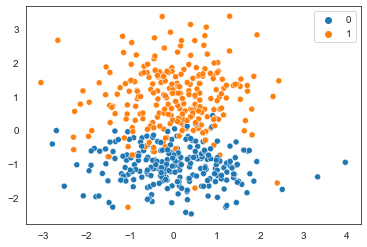

In [39]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

### Adding '1' to X

In [40]:
X = np.hstack((np.array([1]*len(X)).reshape(len(X),1) , X))

### Gradient Descent

In [42]:
alpha = 0.5
m = X.shape[0]
n = X.shape[1]

b = np.random.rand(1,n)[0]

cost = []
accuracy = []
number_of_iterations = 0
max_number_of_iterations = 5000

while True:
    h = predict(X, b)
    current_accuracy = get_accuracy(h, y)
    current_cost = get_cost(h, y)
    
    if ((len(cost) > 1) and (abs(current_cost - cost[-1]) < 0.005)) or (
        number_of_iterations > max_number_of_iterations):
        break
        
    cost.append(current_cost)
    accuracy.append(current_accuracy)
    number_of_iterations += 1
    
    for i in range(n):
        b[i] = b[i] - (alpha/m)*np.sum((h - y)*X.T[i])
    

### Convergence graph of Cost function

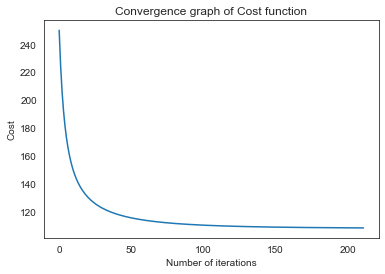

In [43]:
plt.plot(range(number_of_iterations), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence graph of Cost function')  
plt.show()

### Accuracy of our model is:


In [56]:
print(accuracy[-1]*100,'%')

92.2 %


### Optimal Parameters

In [45]:
b

array([6.82246135e-01, 1.73564769e-03, 3.46469195e+00])

### Plotting the decision boundry

/Users/batul/workspace/ds-poc/vir_env_3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


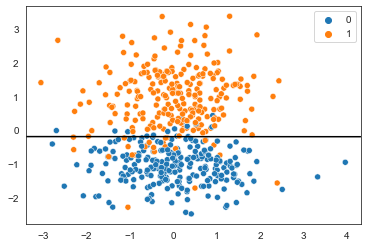

In [46]:
slope = -(b[1] / b[2])
intercept = -(b[0] / b[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");